In [119]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [120]:
import numpy as np
import pandas as pd

In [121]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [122]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [123]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [124]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [125]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [126]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [127]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

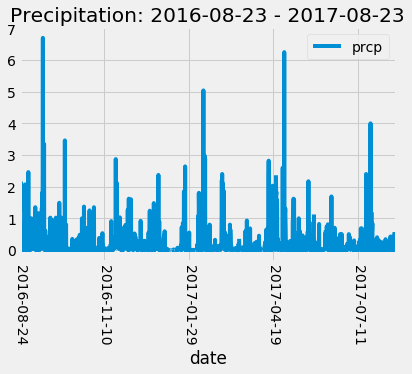

In [128]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

#Get Latest Date in Table
startDate = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
startDate = np.ravel(startDate)[0]
#Get 1 year before latest date
endDate = dt.datetime.strptime(StartDate, '%Y-%m-%d') - dt.timedelta(days=1*365)
endDate = (endDate.strftime('%Y-%m-%d'))

# Perform a query to retrieve the data and precipitation scores
precipitation = (session.query(Measurement.date, Measurement.prcp)
                .filter(Measurement.date > endDate)
                .order_by(Measurement.date.asc())
                     .all())


# Save the query results as a Pandas DataFrame and set the index to the date column
prcpTable = pd.DataFrame(precipitation)
prcpTable = prcpTable.set_index('date')
# Sort the dataframe by date
prcpTable = prcpTable.sort_index(ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data

title = f'Precipitation: {EndDate} - {StartDate}'

prcpTable.plot(title=title, rot=270)

![precipitation](Images/precipitation.png)

In [93]:
# Use Pandas to calcualte the summary statistics for the precipitation data
PrcpTable.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [94]:
# Design a query to show how many stations are available in this dataset?
NumStations = session.query(Station).count()
print(f"Number of Stations: {NumStations}")

Number of Stations: 9


In [95]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
StationFrequency = session.query(Measurement.station,
    func.count(Measurement.station).label('Frequency')
    ).group_by(Measurement.station
    ).order_by(desc('Frequency')).all()



newtable = pd.DataFrame(StationFrequency)
StationFrequency
print(newtable)


       station  Frequency
0  USC00519281       2772
1  USC00519397       2724
2  USC00513117       2709
3  USC00519523       2669
4  USC00516128       2612
5  USC00514830       2202
6  USC00511918       1979
7  USC00517948       1372
8  USC00518838        511


In [96]:
MostFrequent = StationFrequency[0][0]
HighestTemp = (session.query(Measurement.tobs)
                            .filter(Measurement.station == MostFrequent)
                            .order_by(Measurement.tobs.desc())
                            .first())

LowestTemp = (session.query(Measurement.tobs)
                            .filter(Measurement.station == MostFrequent)
                            .order_by(Measurement.tobs.asc())
                            .first())

AvgTemp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == MostFrequent)
                  .first())
AvgTemp = round(np.ravel(AvgTemp)[0],2)



LowestTemp,HighestTemp,AvgTemp

((54.0), (85.0), 71.66)

In [97]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


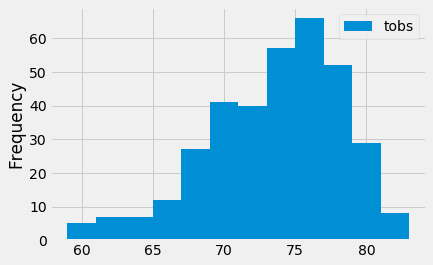

In [109]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
TempStartDate = (session.query(Measurement.date)
                 .order_by(Measurement.date.desc())
                 .first())

TempStartDate = np.ravel(StartDate)[0]
#Get 1 year before latest date
TempEndDate = dt.datetime.strptime(TempStartDate, '%Y-%m-%d') - dt.timedelta(days=1*365)
TempEndDate = (TempEndDate.strftime('%Y-%m-%d'))

# Perform a query to retrieve the data and precipitation scores
Temperature = (session.query(Measurement.station, Measurement.date, Measurement.tobs)
                .filter(Measurement.date > EndDate)
                .filter(Measurement.station == MostFrequent)
                .order_by(Measurement.date.asc())
                     .all())
TempDf = pd.DataFrame(Temperature)
TempDf.plot.hist(bins = 12)

![precipitation](Images/station-histogram.png)

In [105]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [118]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
TripDate = ['2016-10-10','2016-12-12']
#Get 1 year before latest date
TripStartDate = dt.datetime.strptime(TripDate[0], '%Y-%m-%d') - dt.timedelta(days=1*366)
TripEndDate = dt.datetime.strptime(TripDate[1], '%Y-%m-%d') - dt.timedelta(days=1*366)
TripEndDate = (TripEndDate.strftime('%Y-%m-%d'))
TripStartDate = (TripStartDate.strftime('%Y-%m-%d'))
print(calc_temps(TripStartDate,TripEndDate))

[(64.0, 75.37268518518519, 83.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
